# Support Vector Machine on Iris dataset
### by maryam babaei

### ۱.اضافه کردن کتابخانه های مورد نیاز 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

### ۲.خواندن داده ها با کمک کتابخانه پانداس و نمایش پنج ردیف از دیتا  

In [2]:
df = pd.read_csv('iris.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### ۴. رسم نمودار pairplot برای مشاهده ی رابطه ی ستون ها با هم 


### نمودار های روی قطر اصلی نشان دهنده توزیع آن داده است که برای هر گونه با رنگ متفاوت رسم شده است

<Figure size 3200x1200 with 0 Axes>

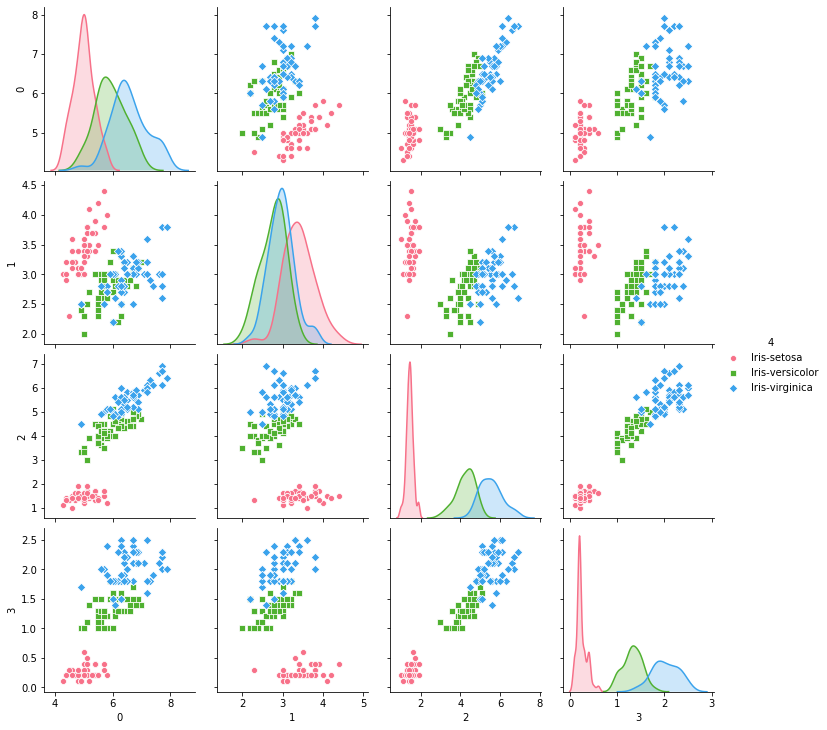

In [3]:
plt.figure(figsize = (16,6),dpi = 200)
sns.pairplot(df,hue=4,palette="husl", markers=["o", "s", "D"])
plt.show()

### ۵. کد کردن کلاس های مختلف گل زنبق به اعداد ۰ و ۱و ۲ 

In [4]:
class_le = LabelEncoder()
y = class_le.fit_transform(df[4].values)
X = df.iloc[:,range(0,2)].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### ۶. فراخوانی چهار تابع مختلف svm 

In [5]:
h = .02
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

/Library/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### ۷. محاسبه ی کمترین و بیشترین مقدار دیتا ها برای محاسبه مختصات برای رسم نمودار ها 

In [6]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

### ۸.مشخص کردن نام هر مدل

In [8]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with polynomial kernel (degree 3)',
          'SVC with RBF kernel']


### ۹. رسم نمودار سابپلات برای هر جهار مدل و مقایسه

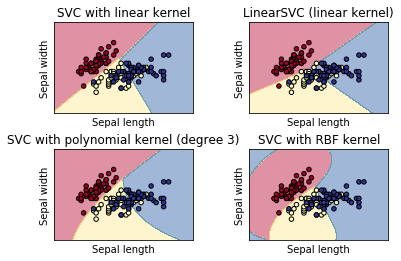

In [9]:
for i, clf in enumerate((svc, lin_svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5 )

    plt.scatter(X[:, 0], X[:, 1],c=y,s=20, edgecolors='k',  cmap=plt.cm.RdYlBu)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])